In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
# Load data
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Basic stats
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

# Headline length analysis
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())

# Articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Top publishers:")
print(publisher_counts.head(10))

Dataset shape: (1407328, 6)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
Date range: 2009-02-14 00:00:00 to 2020-06-11 17:12:35-04:00
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
Top publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


## Date Analysis


News Articles by Year:
year
2011      760
2012     1181
2013     1246
2014     1189
2015     3695
2016     4223
2017     3581
2018     5395
2019     6325
2020    28392
Name: count, dtype: int64


/var/folders/yy/4gyb_b194zj9hml4grr4vbjm0000gn/T/ipykernel_8795/2541991084.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')


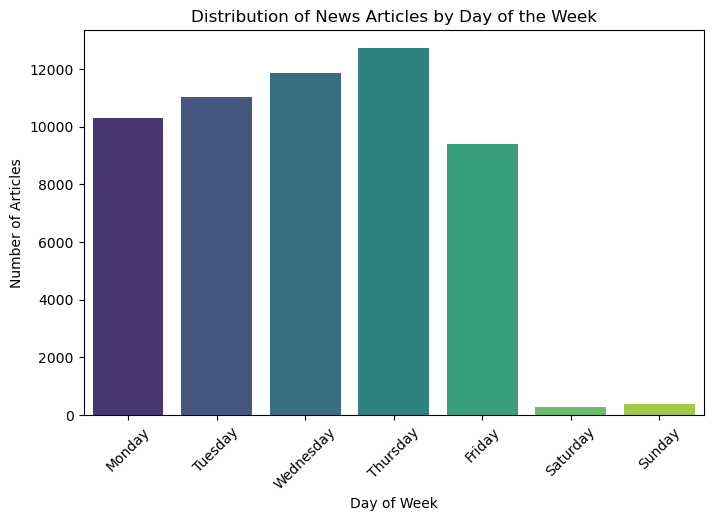

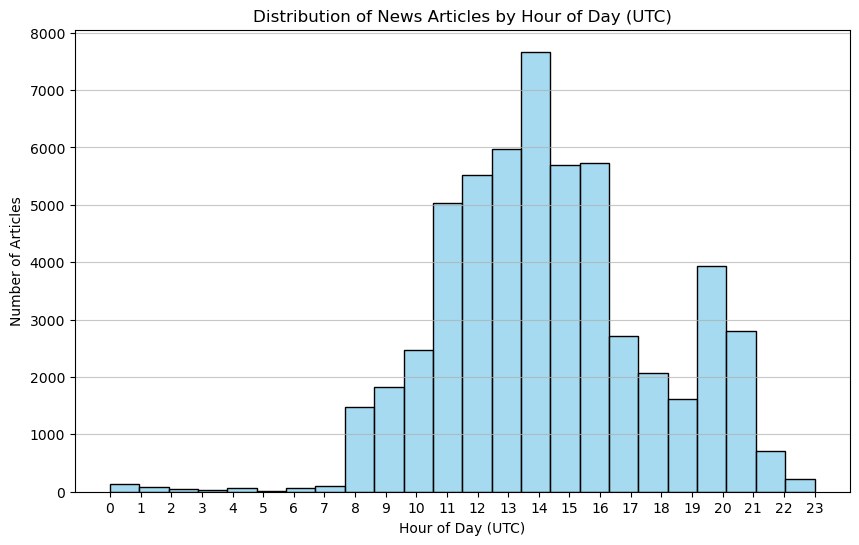

In [17]:
# Convert 'date' to datetime objects, coercing unparsable values to NaT
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Drop rows where the date couldn't be parsed, or handle them as NaT if needed
# For simplicity, we can drop them if they are few:
df.dropna(subset=['date'], inplace=True)
# Extract date-related features
df['publication_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['year'] = df['date'].dt.year

print("\nNews Articles by Year:")
print(df['year'].value_counts().sort_index())

# Plot articles per day of the week
plt.figure(figsize=(8, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')
plt.title('Distribution of News Articles by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


# Plot articles per hour of the day (Time Series Analysis)
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of News Articles by Hour of Day (UTC)')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.7)
plt.show()

## Topic Modeling

In [18]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Combine all headlines into a single string
all_headlines = ' '.join(df['headline'].tolist())

# Tokenize and clean the text (remove punctuation, lower case)
tokens = re.findall(r'\b\w+\b', all_headlines.lower())

# Remove stop words (common words like 'the', 'a', 'and')
stop_words = set(stopwords.words('english'))
# Add finance-specific stopwords that may be too common to be insightful
custom_stopwords = {'stock', 'company', 'market', 'price', 'shares', 'firm'}
tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]

# Calculate word frequency (Unigrams)
word_counts = Counter(tokens)
print("\nTop 20 most frequent words in headlines:")
print(word_counts.most_common(20))

# N-gram analysis (e.g., Bigrams)
bigrams = nltk.ngrams(tokens, 2)
bigram_counts = Counter(bigrams)
print("\nTop 10 most frequent Bigrams:")
print(bigram_counts.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liluebuy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top 20 most frequent words in headlines:
[('stocks', 12794), ('0', 9901), ('week', 9029), ('52', 8453), ('trading', 6575), ('hit', 5902), ('eps', 5531), ('companies', 4778), ('target', 4676), ('several', 4650), ('sales', 4429), ('higher', 4271), ('estimate', 3818), ('lows', 3741), ('session', 3394), ('maintains', 3266), ('us', 3180), ('new', 3110), ('yesterday', 3067), ('q1', 3019)]

Top 10 most frequent Bigrams:
[(('52', 'week'), 8251), (('stocks', 'hit'), 5847), (('hit', '52'), 5846), (('eps', '0'), 4303), (('companies', 'trading'), 4091), (('week', 'lows'), 3687), (('trading', 'higher'), 3516), (('stocks', 'moving'), 2841), (('week', 'highs'), 2561), (('trading', 'lower'), 2152)]
